# Kernelized Support Vector Machine

Also known as SVMs, are an extension that allows for more complex models that are not defined simply by hyperplanes in the input space.

Linear model can be quite limiting in low-dimensional spaces. as lines and hyperplanes have limited flexibility.

In [1]:
import matplotlib.pyplot as plt
import mglearn

Text(0.5, 0, 'Feature 1')

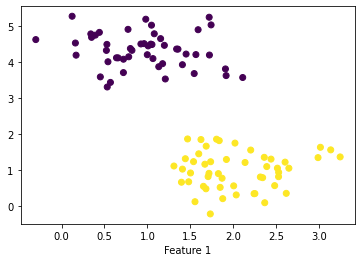

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, cluster_std=0.5, random_state=0)

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

Text(0, 0.5, 'Feature 1')

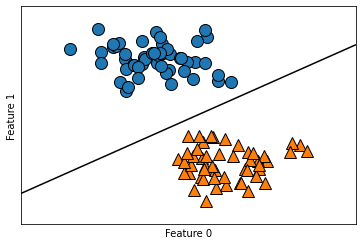

In [3]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC().fit(X,y)


mglearn.plots.plot_2d_separator(lin_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y, s=12)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'Feature 1')

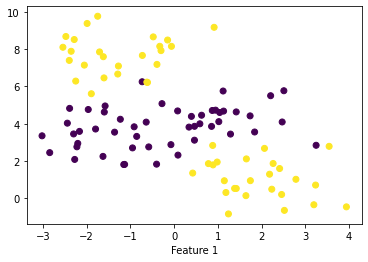

In [4]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=0)
y = y%2 # rescale class value to 0 and 1

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 0")
plt.xlabel("Feature 1")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

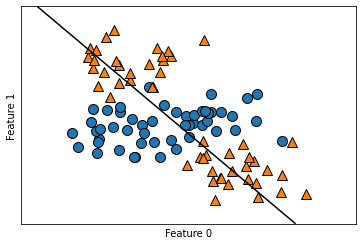

In [5]:
from sklearn.svm import LinearSVC
lin_svm = LinearSVC().fit(X,y)

mglearn.plots.plot_2d_separator(lin_svm, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In this case, a linear model apprantly cannot separate the dataset well.

The next step is to expand the set of input features, say adding feature **feature1^2**. Now we represent it the dataset in 3-dimensional point (feature 0, feature 1, feature1^2)

In [6]:
import numpy as np

In [7]:
X_new = np.hstack([X, X[:,1:]**2])
X_new

array([[ 4.65464941e-01,  3.12315514e+00,  9.75409805e+00],
       [-2.54111268e+00,  8.10251088e+00,  6.56506826e+01],
       [ 1.73730780e+00,  4.42546234e+00,  1.95847170e+01],
       [ 1.13121750e+00,  4.68194985e+00,  2.19206544e+01],
       [ 2.20656076e+00,  5.50616718e+00,  3.03178770e+01],
       [ 5.88943261e-01,  4.00148458e+00,  1.60118788e+01],
       [-2.38812970e+00,  4.82794721e+00,  2.33090743e+01],
       [-2.98834968e-01,  7.92301126e+00,  6.27741074e+01],
       [-7.30000112e-01,  6.25456272e+00,  3.91195549e+01],
       [-1.61743761e+00,  7.59608084e+00,  5.77004441e+01],
       [-6.08124249e-01,  6.21850397e+00,  3.86697916e+01],
       [-2.24847112e+00,  6.29068892e+00,  3.95727671e+01],
       [-1.28753859e+00,  6.66736652e+00,  4.44537763e+01],
       [-7.24979114e-01,  7.66391368e+00,  5.87355730e+01],
       [-3.91425163e-01,  7.18443442e+00,  5.16160980e+01],
       [ 3.93841822e+00, -4.50095401e-01,  2.02585870e-01],
       [ 8.82144116e-01,  2.84128485e+00

Text(0.5, 0, 'new feature')

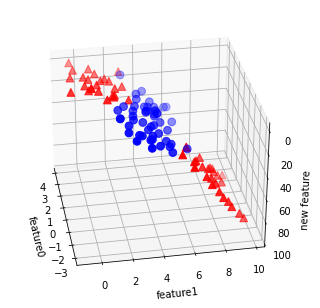

In [8]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()
# Visualize in 3D
ax = Axes3D(figure, elev=-150, azim=10)
# mask represent the classes, plot class=0 first and then plot class=1
mask = y ==0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
          cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
          cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("new feature")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1^2')

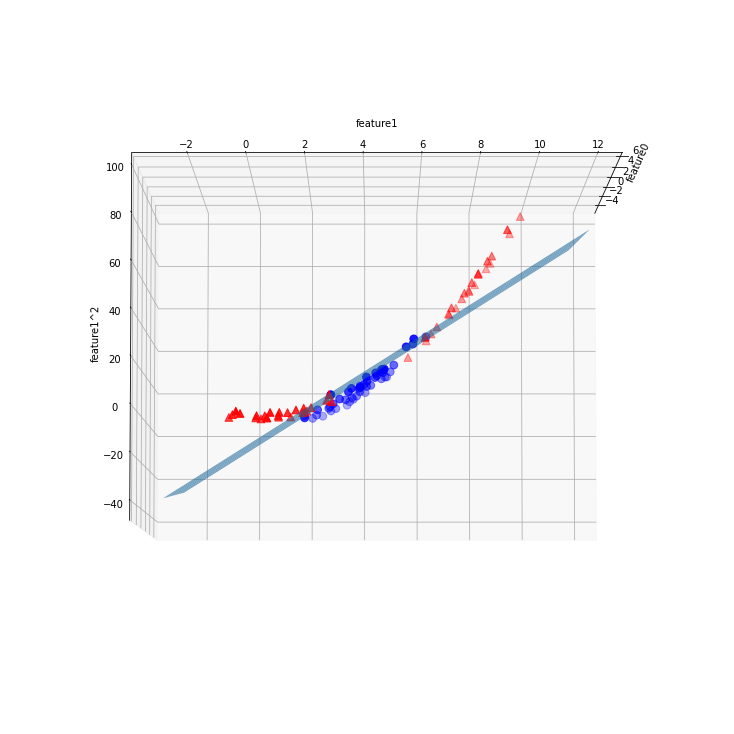

In [9]:
lin_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = lin_svm_3d.coef_.ravel(), lin_svm_3d.intercept_.ravel()

# draw decision boundary plane
figure = plt.figure(figsize=(10,10))
ax = Axes3D(figure, elev=-5, azim=0)
xx = np.linspace(X_new[:,0].min()-2, X_new[:, 0].max()+2, 50)
yy = np.linspace(X_new[:,1].min()-2, X_new[:, 1].max()+2, 50)

XX, YY = np.meshgrid(xx, yy)
# coef0*feature0 + coef1*feature1 + coef2*(feature1^2)
ZZ = (coef[0]*XX+coef[1]*YY+intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.6)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
               cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
               cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1^2")

By upgrading a two-dimensional dataset to three-dimensional, we now can use a plane to separate two classes. That is the core of SVM.

In [10]:
coef, intercept

(array([ 0.23156332, -1.67051275,  0.21571896]), array([2.23806149]))

In [11]:
mask

array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False, False, False, False, False, False, False, False,  True,
        True, False,  True, False,  True, False,  True,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
       False, False, False,  True,  True,  True, False,  True,  True,
       False, False,  True,  True,  True,  True, False,  True,  True,
        True, False, False, False, False, False, False, False, False,
        True, False, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True, False, False, False,
       False,  True,  True, False,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True])

Transfer it as a two-dimensional plot, it is actually a nonlinear decision boundary.

Text(0, 0.5, 'feature1')

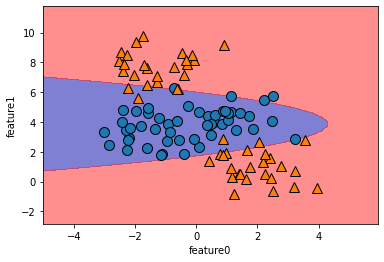

In [12]:
# Draw decision boundary
ZZ = YY**2
decision = lin_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, decision.reshape(XX.shape), levels=[decision.min(), 0, decision.max()],
            cmap=mglearn.cm2, alpha=0.5 )
mglearn.discrete_scatter(X[:,0], X[:,1], y)
plt.xlabel("feature0")
plt.ylabel("feature1")

**Adding nonlinear features to the representation of our data can make linear models much more powerful.**

## Kernel trick

**Kernel trick** allows us to learn a classifier in a high-dimensional space without actually computing the new, possibly features. Kernel trick works by directly computing the distance of the data points for the expand feature representation.

There are two ways to map your data into a higher-dimensional space that re commonly used with SVMs:
* the polynomial kernel - computes all possible polynomials up to a certaindegree of the original features (like feature1^2 * feature2^5)
* radial basis function (RBF) kernel (also known as Gaussian kernel) - it considers all possible polynomials of all degrees, but the importance of the features decreases for higher degrees.

### RBF kernel

Typically only a subset of the training data points matter for defining the decision boundary: the ones that lie on the border between the classes. These are called **support vector**.

To make a prediction, the test data point's distance to each **support vector** is measured, and make classification decision based on the distance.

Text(0, 0.5, 'feature1')

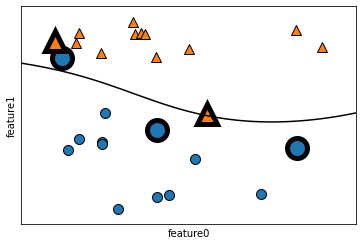

In [13]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X,y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:,0], X[:,1], y)

# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=20, markeredgewidth=5)
plt.xlabel("feature0")
plt.ylabel("feature1")

In [14]:
sv, sv_labels

(array([[ 8.1062269 ,  4.28695977],
        [ 9.50169345,  1.93824624],
        [11.563957  ,  1.3389402 ],
        [10.24028948,  2.45544401],
        [ 7.99815287,  4.8525051 ]]),
 array([False, False, False,  True,  True]))

Those larger data points with bolder edge are our svm model's support vectors.The SVM yields a very smooth and nonlinear boundary. There are two hyperparameters: `C` and `gamma`.

## Analyze SVM

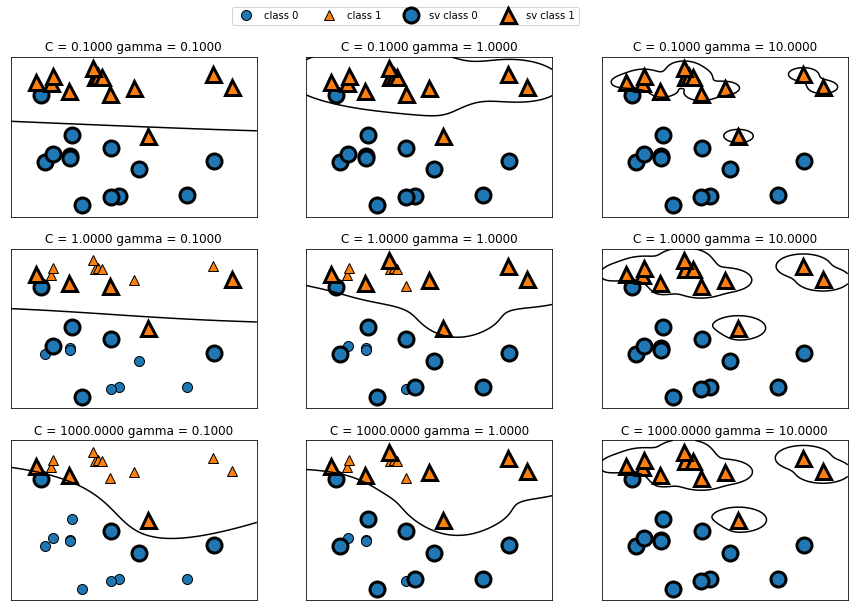

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(15,10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0,0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))

From left to right, the `gamma` increases. With larger `gamma`, the decision boundary tend to focus more on single points and it considers all data points as support vector. A lower `gamma` means that the decision boundary will vary slowly, which yields a model with low complexity.

From top ti bottom, the `C` increases. With a small C means a very restricted modek, where each data point can only have limited influence.

`gamma` and `C` both control the complexity of the model, with large values in either resulting in a more complex model.

## Applying SVM on real data

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test,y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# default: RBF
svc = SVC().fit(X_train, y_train)

print("Accuracy on traing set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on traing set: 0.904
Accuracy on test set: 0.937


In [17]:
cancer.data.max(), cancer.data.min()

(4254.0, 0.0)

In [18]:
import pandas as pd
pd.DataFrame(cancer.data).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svc2 = SVC().fit(X_train_scaled, y_train)

print("Accuracy on traing set: {:.3f}".format(svc2.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc2.score(X_test_scaled, y_test)))

Accuracy on traing set: 0.984
Accuracy on test set: 0.972


### Select best params

In [22]:
from sklearn.model_selection import GridSearchCV
params ={'C':[0.001, 0.01, 0.1, 1, 10, 100],
            'gamma':[0.001, 0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(SVC(), param_grid=params, cv=5)

grid_search.fit(X_train_scaled, y_train)
print("Test score: {:.3f}".format(grid_search.score(X_test_scaled, y_test)))
print("Best params: {}".format(grid_search.best_params_))

Test score: 0.972
Best params: {'C': 1, 'gamma': 1}


In [23]:
import pandas as pd
results  = pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012792,0.002757,0.004139,0.001801,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
1,0.007094,0.001214,0.001917,0.000376,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
2,0.006886,0.001272,0.002006,0.000942,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
3,0.005857,0.000172,0.001404,0.000041,0.001,1,"{'C': 0.001, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
4,0.005502,0.000271,0.001330,0.000080,0.001,10,"{'C': 0.001, 'gamma': 10}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
5,0.005308,0.000417,0.001342,0.000119,0.001,100,"{'C': 0.001, 'gamma': 100}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
6,0.004708,0.000119,0.001227,0.000097,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
7,0.005611,0.000716,0.001512,0.000122,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
8,0.005548,0.000354,0.001470,0.000082,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18
9,0.005299,0.000338,0.001318,0.000103,0.01,1,"{'C': 0.01, 'gamma': 1}",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,18


<AxesSubplot:>

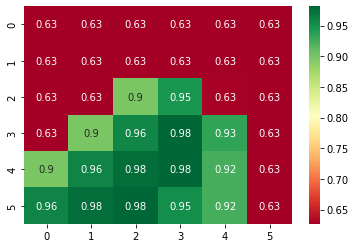

In [29]:
import seaborn as sns

scores = np.array(results.mean_test_score).reshape(6,6)

sns.heatmap(scores, cmap='RdYlGn', annot=True)

# Conclusion

Strength:
* work well on low-dimension and high-dimension data.

Weakness:
* don't scale very well with large number of samples.
* require data preprocessing (a similar scaler (e.g. between 0 and 1)).